In [3]:
#Cargamos las librerías necesarias para el análisis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import time 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat

In [3]:
datat = loadmat('/home/floayza/Documentos/lina/writing_task/Habits_76/otros experiments/Habits_76_baseline_all_trials.mat')
#datat

FileNotFoundError: [Errno 2] No such file or directory: '/home/floayza/Documentos/lina/writing_task/Habits_76/otros experiments/Habits_76_baseline_all_trials.mat'

In [46]:
import glob
from scipy.io import loadmat
data=[]
wdata=[]
i=0
for file in sorted(glob.glob("../data/Francis_data/Francis_data/Baseline_fmri/Right_MAS/Habits_10/*.mat")):
    dat=loadmat(file)
    thePoints=dat['S']['thePoints'][0][0]
    Sbuttons=dat['S']['Sbuttons']
    Ts=dat['S']['Ts'][0][0][0]
    trial=dat['S']['trial_cond'][0][0][i][0]
    length=len(Sbuttons[0][0])
    rule = Ts[-1]/length
    time = np.transpose(np.arange(start=0, stop=Ts[-1]+rule, step=rule))
    data=[time, thePoints[:,0], thePoints[:,1], trial]
    data=np.transpose([time, thePoints[:,0], thePoints[:,1], trial])
#    data = data[(data[1] != 683) & (data[2] != 384)]
#    df=pd.DataFrame.transpose(pd.DataFrame(data))
    wdata.append(data)
    i=i+1
    data=[]
#    print(file,i)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

In [45]:
df=pd.DataFrame(wdata)
df.rename(columns={0: "time", 1: "X", 2: 'Y', 3: 'cond'}, inplace=True)
print(wdata)

[]


In [41]:
# plot from raw data
a=11 # number of trial
plt.plot(df['X'][a],df['Y'][a],)
plt.ylim(df['Y'][a].min()+200,df['Y'][a].min())

KeyError: 'X'

In [18]:
alldata=pd.DataFrame(wdata)
alldata.rename(columns={0: "time", 1: "coords"}, inplace=True)

In [38]:
alldata['coords'][0]
#writing_coords = alldata['coords'][0]
writing_coords=pd.DataFrame(alldata['coords'][0])

In [39]:
writing_coords

,0
0,683
1,683
2,683
3,683
4,683
...,...
2360,685
2361,685
2362,685
2363,685


In [11]:
Ts[-1]/length

0.010017136340852141

In [40]:
#datat = loadmat('/home/floayza/Documentos/lina/writing_task/Habits_76/Habits_76_baseline_all_trials.mat')
tc=data['S']['trial_cond'][0]
tc

TypeError: list indices must be integers or slices, not str

In [23]:
data01 = loadmat('/home/floayza/Documentos/lina/writing_task/Habits_76/Habits_76_baseline_trial28.mat')
data01

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Feb 01 11:38:15 2023',
 '__version__': '1.0',
 '__globals__': [],
 'S': array([[(array(['Habits_76_baseline'], dtype='<U18'), array([[0.01]]), array([[   0,    0, 1366,  768]], dtype=uint16), array([[683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                [683, 384],
                

In [24]:
thePoints=pd.DataFrame(data01['S']['thePoints'])

In [25]:
Sbuttons=pd.DataFrame(data01['S']['Sbuttons'])
Sbuttons.shape

(1, 1)

In [26]:
Ts=pd.DataFrame(data01['S']['Ts'])
Ts.shape

(1, 1)

In [350]:
Ts.rename(columns={0: "time"}, inplace=True)

In [351]:
print(Ts.shape)
length=Sbuttons.shape[0]
rule = (Ts['time'].iloc[-1]/length)
time = pd.DataFrame(np.arange(start=0, stop=Ts['time'].iloc[-1]+rule, step=rule))
time

(12732, 1)


,0
0,0.000000
1,0.010015
2,0.020030
3,0.030046
4,0.040061
...,...
357,3.575422
358,3.585437
359,3.595452
360,3.605468


In [352]:
thePoints.rename(columns={0: "x", 1: "y"}, inplace=True)

In [353]:
# concat variables time and coords. important: time and coords are not the same size. I dont know why?
frames=[time,thePoints]
writing_coords=pd.concat(frames, axis=1)
writing_coords.rename(columns={0:'time'}, inplace=True)
writing_coords

,time,x,y
0,0.000000,683,384
1,0.010015,683,384
2,0.020030,683,384
3,0.030046,683,384
4,0.040061,683,384
...,...,...,...
357,3.575422,700,522
358,3.585437,700,522
359,3.595452,700,522
360,3.605468,700,522


In [354]:
# delete origin values
writing_coords = writing_coords[(writing_coords.x != 683) & (writing_coords.y != 384)]

(581.0, 451.0)

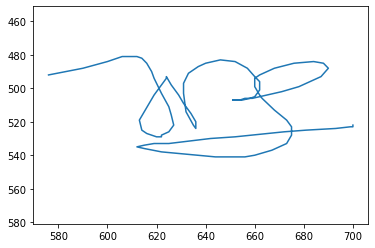

In [355]:
# plot from raw data
plt.plot(writing_coords['x'],writing_coords['y'],)
plt.ylim(writing_coords['y'].min()+100,writing_coords['y'].min()-30)

In [31]:
# select variables
trial_cond=datat['all_trials']['S']['trial_cond']
onset_image=pd.DataFrame(datat['all_trials']['S']['onset_image'])
endtrial_time=pd.DataFrame(datat['all_trials']['S']['endtrial_time'])

In [32]:
# check variable size
print(onset_image.shape)
print(endtrial_time.shape)

(40, 1)
(40, 1)


,0,x,y
0,0.000000,NaN,NaN
1,0.009999,NaN,NaN
2,0.019999,NaN,NaN
3,0.029998,NaN,NaN
4,0.039997,NaN,NaN
...,...,...,...
351,3.509739,809.0,505.0
352,3.519739,809.0,505.0
353,3.529738,809.0,505.0
354,3.539737,809.0,505.0


In [35]:
# delete duplicates values
df1 = writing_coords.drop_duplicates(['x','y'])

df1 = df1.groupby('x', as_index=False).nth(1)
print (df1)

         time      x      y  diff
110  1.190689  550.0  588.0   1.0
111  1.207388  551.0  594.0   6.0
164  1.783269  644.0  593.0  -1.0
173  1.812845  635.0  582.0  -1.0
175  1.814892  642.0  580.0  -1.0
182  1.874129  656.0  582.0   1.0
230  2.357423  680.0  589.0   1.0
231  2.373982  683.0  593.0   4.0
246  2.463197  719.0  580.0  -1.0
263  2.630208  753.0  580.0   1.0
265  2.650362  752.0  581.0   1.0
267  2.674385  751.0  584.0   1.0
340  3.401859  790.0  581.0   6.0
341  3.412365  793.0  585.0   4.0


In [36]:
index0 = df1.iloc[0]
indexend = df1.iloc[-1]
print(index0.name)
print(indexend.name)

110
341
